<a href="https://colab.research.google.com/github/indra622/AIAcademy_SpeechRecognition/blob/main/2_1_basic_MLP_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기초 MLP 모델 실습


### import

In [ ]:
import torch
import torch.nn as nn

### device check

In [ ]:
torch.cuda.is_available()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cuda')

## XOR 문제

Train Sample 

<img src="https://github.com/indra622/AIAcademy_SpeechRecognition/raw/main/img/xor_input.jpg" width=200>

In [ ]:
X = [[0,0], [0,1], [1,0], [1,1]]
Y = [[0],[1],[1],[0]]

In [ ]:
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
X,Y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]), tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [ ]:
X.dtype

torch.float32

### Perceptron
<img src="https://raw.githubusercontent.com/indra622/AIAcademy_SpeechRecognition/main/img/perceptron.jpg" width=400>

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1,bias=True),
    nn.Sigmoid()
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

### loss function and optimizer


In [ ]:
loss_fn = torch.nn.BCELoss()
optim = torch.optim.SGD(model.parameters(),lr = 0.01)

### train loop
- epoch (전체 데이터)

  - batch (전체 데이터의 부분집합)


In [ ]:
model(X)

tensor([[0.5034],
        [0.6718],
        [0.5558],
        [0.7165]], grad_fn=<SigmoidBackward0>)

0 -> False 

1 -> True

In [ ]:
from tqdm.auto import tqdm #progress bar 형식으로 loop의 진행상황을 확인가능

In [ ]:
import time
for _ in tqdm(range(100)):
  time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
n_epoch = 10000
loss_fn = torch.nn.BCELoss()
optim = torch.optim.SGD(model.parameters(),lr = 0.01)

model.to(device)
X = X.to(device)
Y = Y.to(device)

for epoch in tqdm(range(n_epoch)):
  #for batch in train_loader()
  optim.zero_grad()    # gradient 초기화
  pred = model(X)
  loss = loss_fn(pred,Y) # loss(prediction, GT) 
  if epoch %1000 == 0 : 
    print(loss)
  loss.backward()       # back propagation gradient 계산
  optim.step()          # Weight Update




  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
model(X)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], device='cuda:0', grad_fn=<SigmoidBackward0>)

### MLP 
<img src="https://raw.githubusercontent.com/indra622/AIAcademy_SpeechRecognition/main/img/MLP.jpg" width=200>

In [ ]:
MLP_model = nn.Sequential(
    nn.Linear(2,2,bias=True),
    nn.Sigmoid(),
    nn.Linear(2,1,bias=True),
    nn.Sigmoid()
)

In [ ]:
MLP_model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
MLP_model = nn.Sequential(
    nn.Linear(2,2,bias=True),
    nn.Sigmoid(),
    nn.Linear(2,1,bias=True),
    nn.Sigmoid()
)

n_epoch = 10**4 # 10^5
loss_fn = torch.nn.BCELoss()
optim = torch.optim.Adam(MLP_model.parameters(),lr = 0.01)



MLP_model.to(device)
X = X.to(device)
Y = Y.to(device)

losses = []

for epoch in tqdm(range(n_epoch)):
  #for batch in train_loader()
  optim.zero_grad()    # gradient 초기화
  pred = MLP_model(X)
  loss = loss_fn(pred,Y) # loss(prediction, GT) 
  # if epoch %10000 == 0 : 
  #   print(loss)
  losses.append(loss.item())  
  loss.backward()       # back propagation gradient 계산
  optim.step()          # Weight Update




  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
#losses[0].item(),type(losses[0].item())

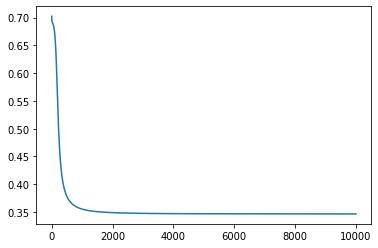

In [ ]:
plt.plot(losses)

In [ ]:
MLP_model(X)

tensor([[3.0583e-05],
        [9.9999e-01],
        [4.9999e-01],
        [5.0001e-01]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
9.3806e-04 # [0,0]

0.00093806

In [ ]:
9.9870e-01 #[0,1]

0.9987

In [ ]:
9.9913e-01 #[1,0]

0.99913

In [ ]:
8.1598e-04 #[1,1]

0.00081598

### Fearture space transformation check?

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
MLP_model[1].register_forward_hook(get_activation('layer1'))
MLP_model(X)

tensor([[3.0583e-05],
        [9.9999e-01],
        [4.9999e-01],
        [5.0001e-01]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], device='cuda:0')

In [ ]:
x1 = activation['layer1'][:,0]
x2 = activation['layer1'][:,1]

In [ ]:
activation['layer1']

tensor([[5.0438e-02, 5.5562e-03],
        [9.8663e-01, 8.9997e-01],
        [1.0000e+00, 1.4383e-09],
        [1.0000e+00, 2.3160e-06]], device='cuda:0')

In [ ]:
x1,x2

(tensor([0.0504, 0.9866, 1.0000, 1.0000], device='cuda:0'),
 tensor([5.5562e-03, 8.9997e-01, 1.4383e-09, 2.3160e-06], device='cuda:0'))

In [ ]:
Y

tensor([[0.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

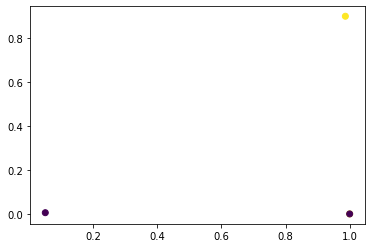

In [ ]:
plt.scatter(x1.cpu(),x2.cpu(),c=Y.cpu())